In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

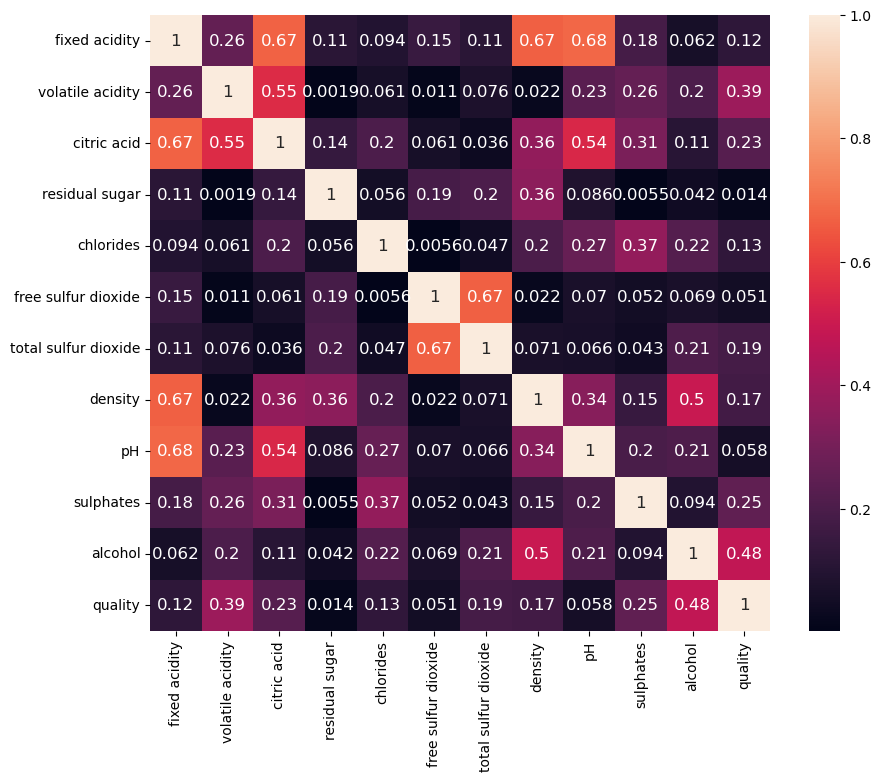

In [8]:
df_corr =data.corr().abs()     # this code will get the coefficient of one variable v/s all other variable (relationship)
                            # abs = absolute numbers u can ignore it as well
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True, annot_kws={'size':12})
plt.show()

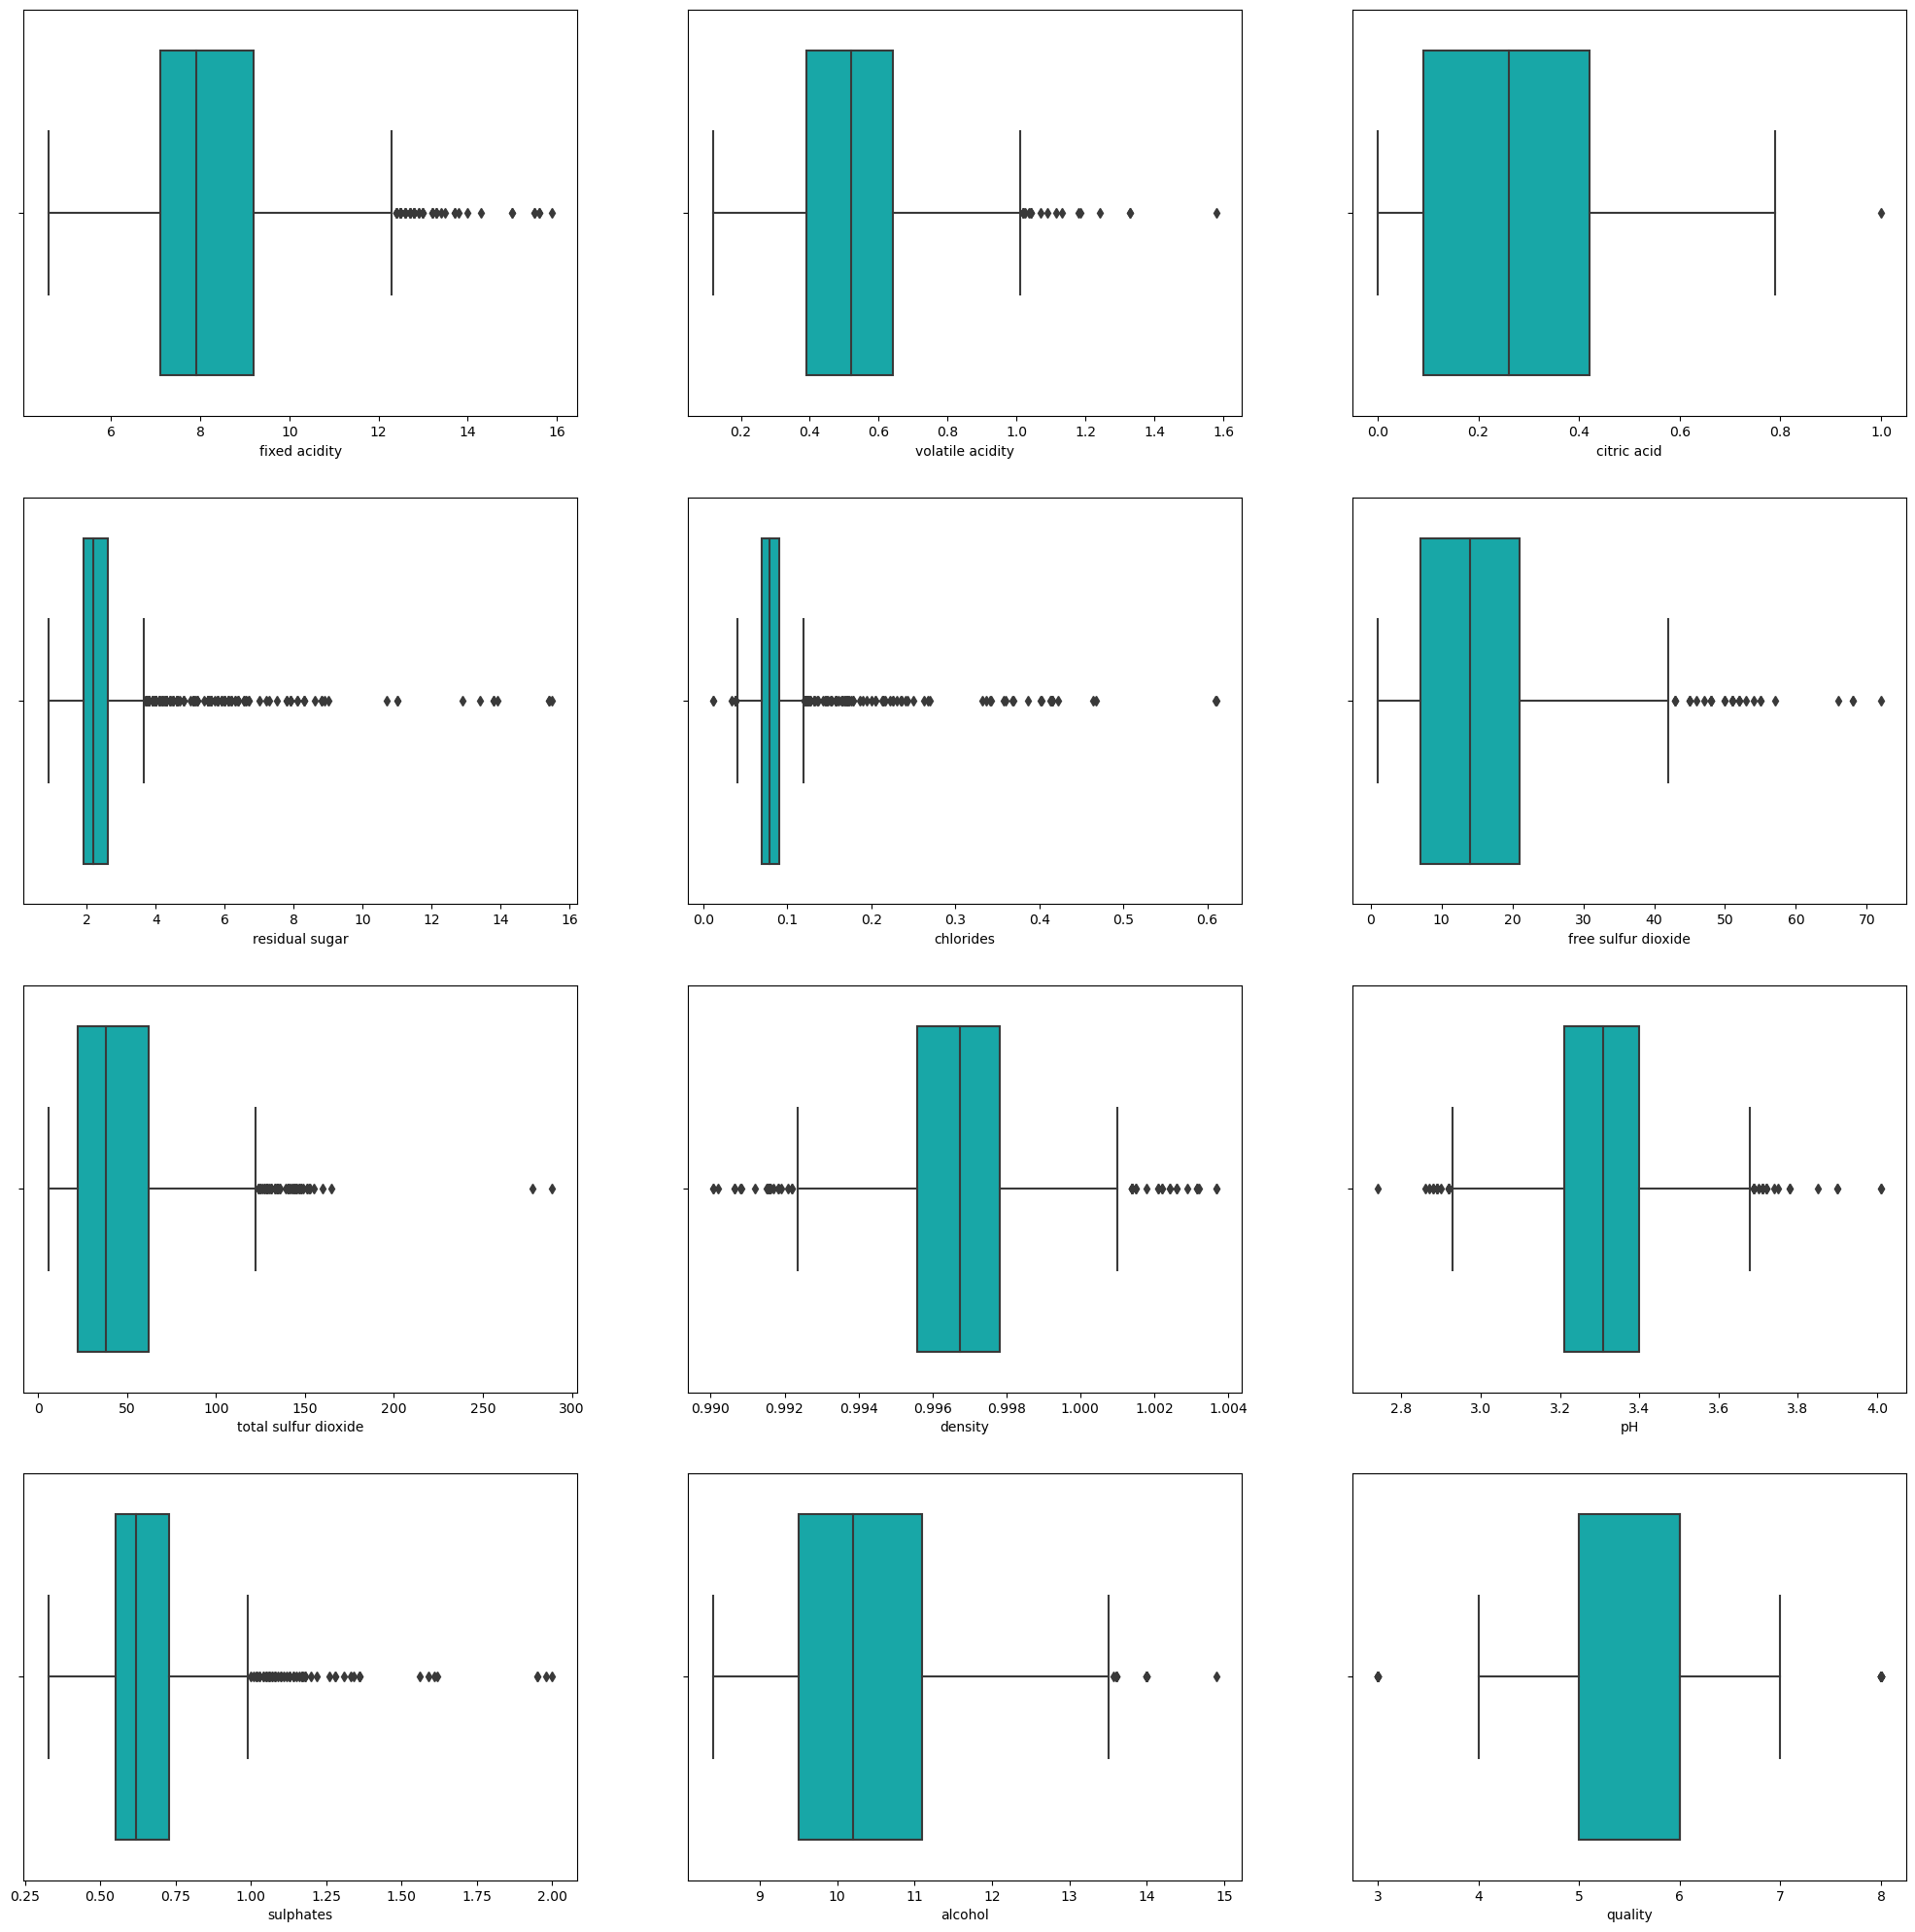

In [9]:
plt.figure(figsize=(25,25))
graph=1

for column in data:
    if graph<=12: 
        ax=plt.subplot(4,3,graph)
        sns.boxplot(data[column],color='c')
        plt.xlabel(column,fontsize=10)
        

    graph+=1
plt.show()

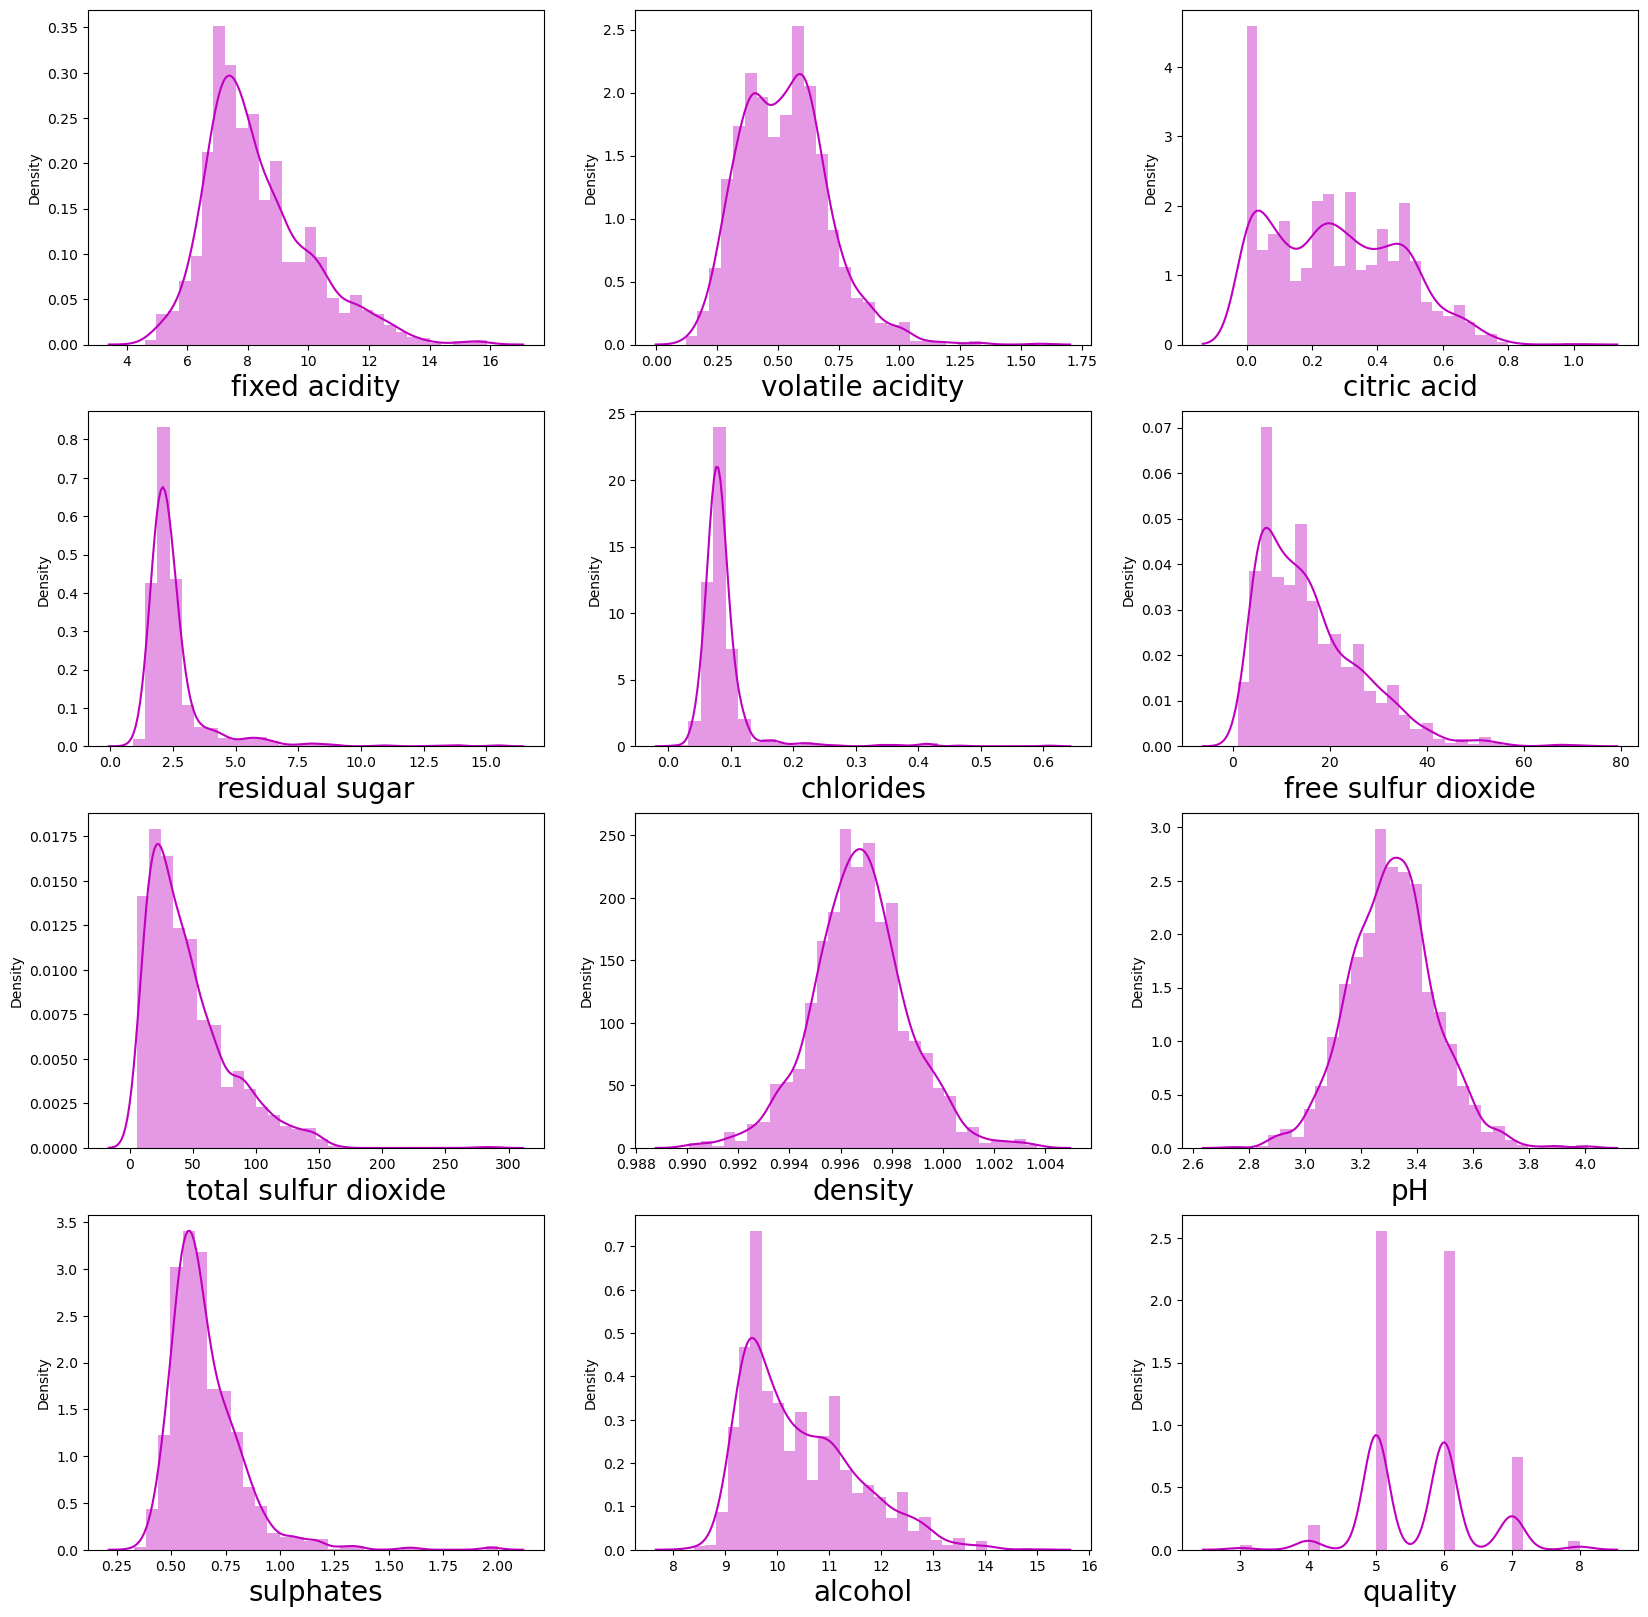

In [10]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column],bins=30, color="m")
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.show()

In [11]:
x =data.drop(['quality'], axis=1)
y =data['quality']

In [12]:
x.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

In [13]:
x_new =power_transform(x)

In [15]:
x = pd.DataFrame(x_new, columns= x.columns)
x.skew().sort_values(ascending=False)

alcohol                 0.112372
citric acid             0.017788
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
density                -0.005054
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
dtype: float64

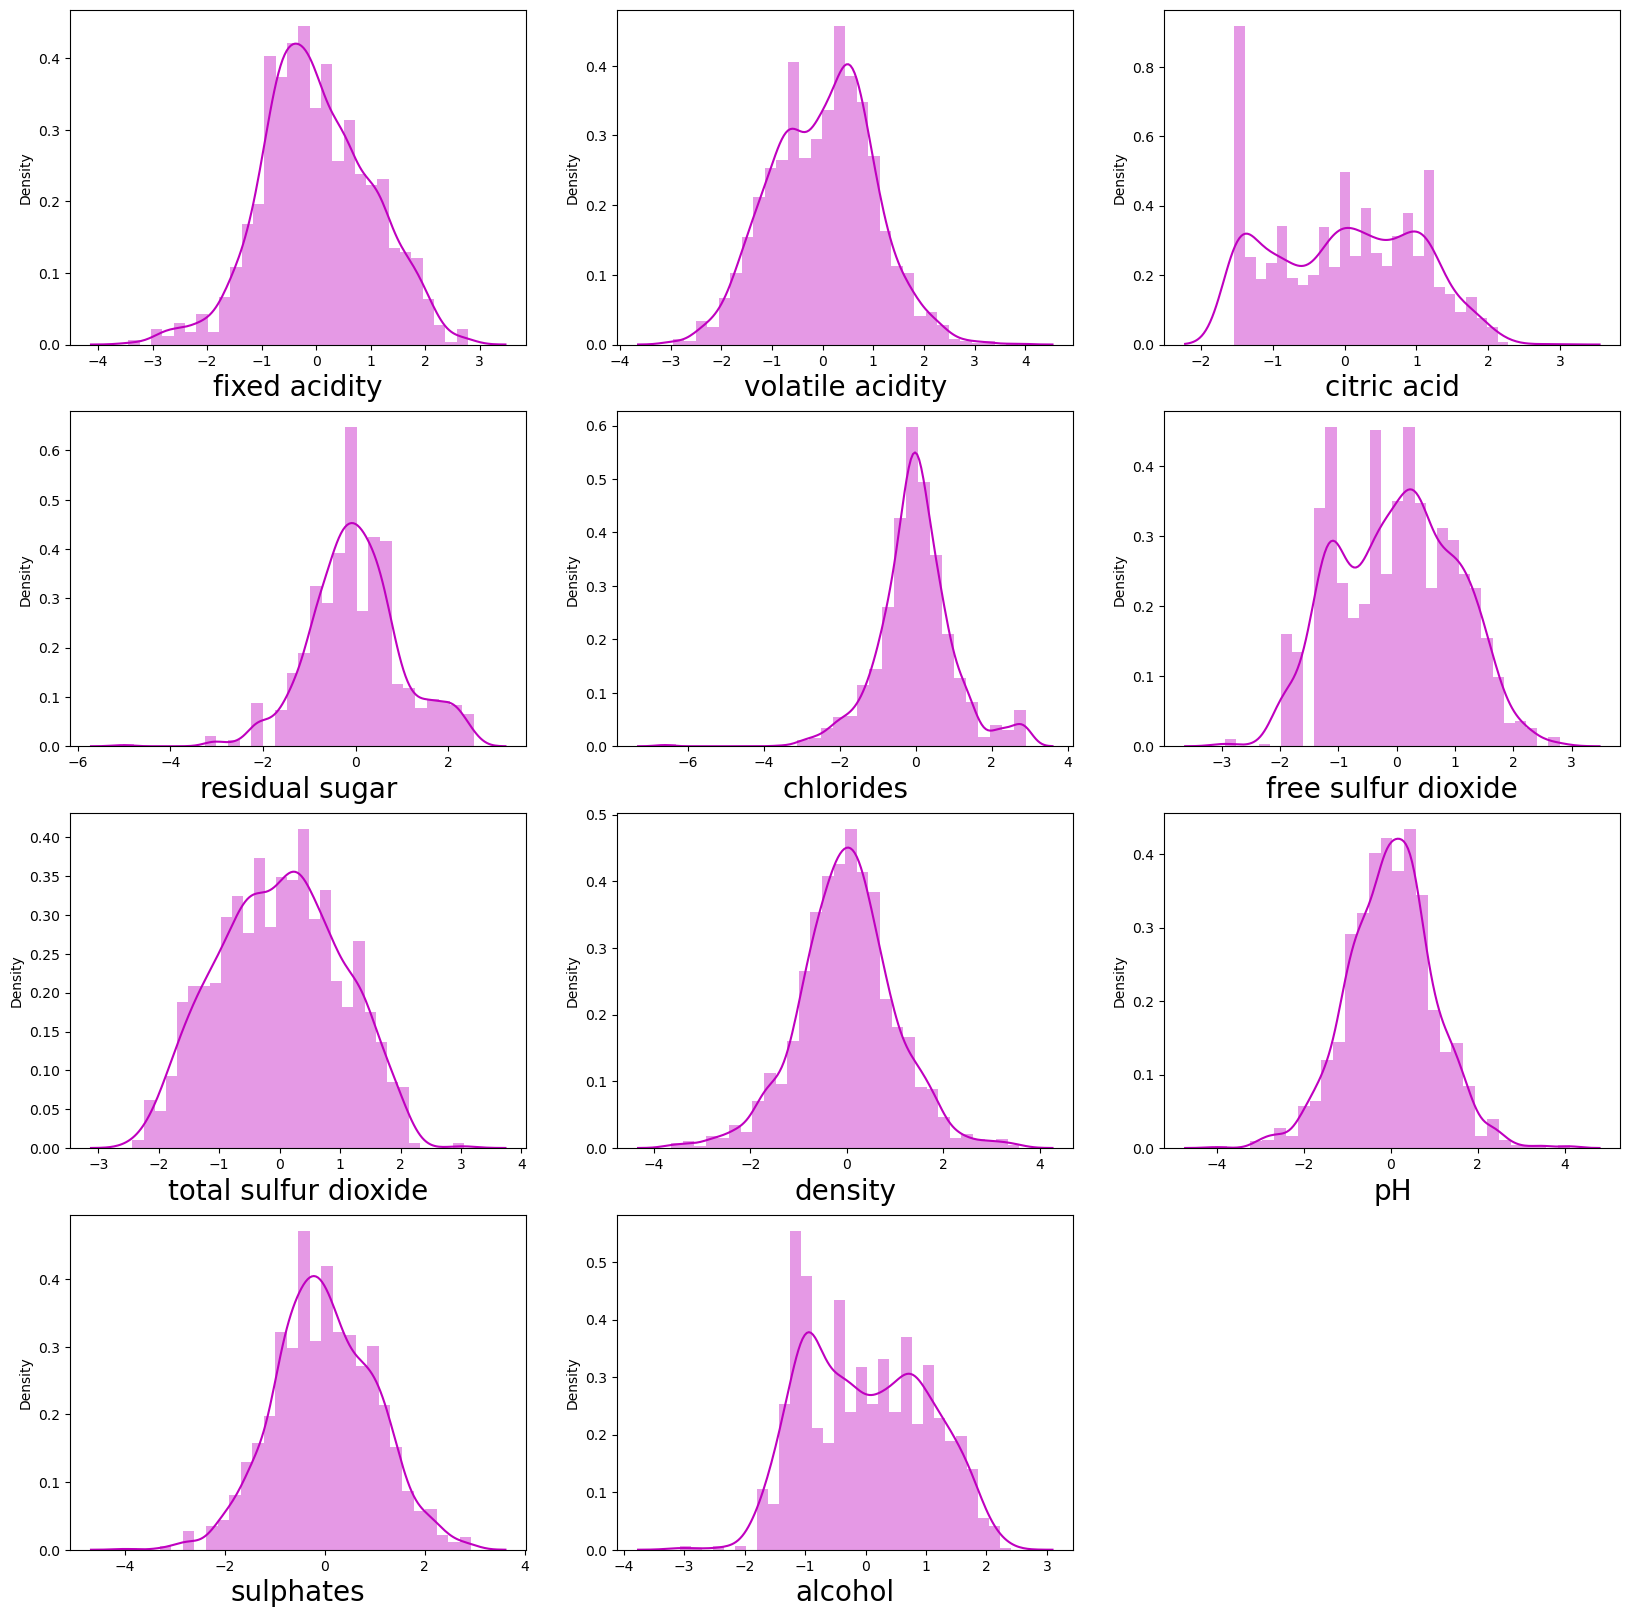

In [16]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(x[column],bins=30, color="m")
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.show()

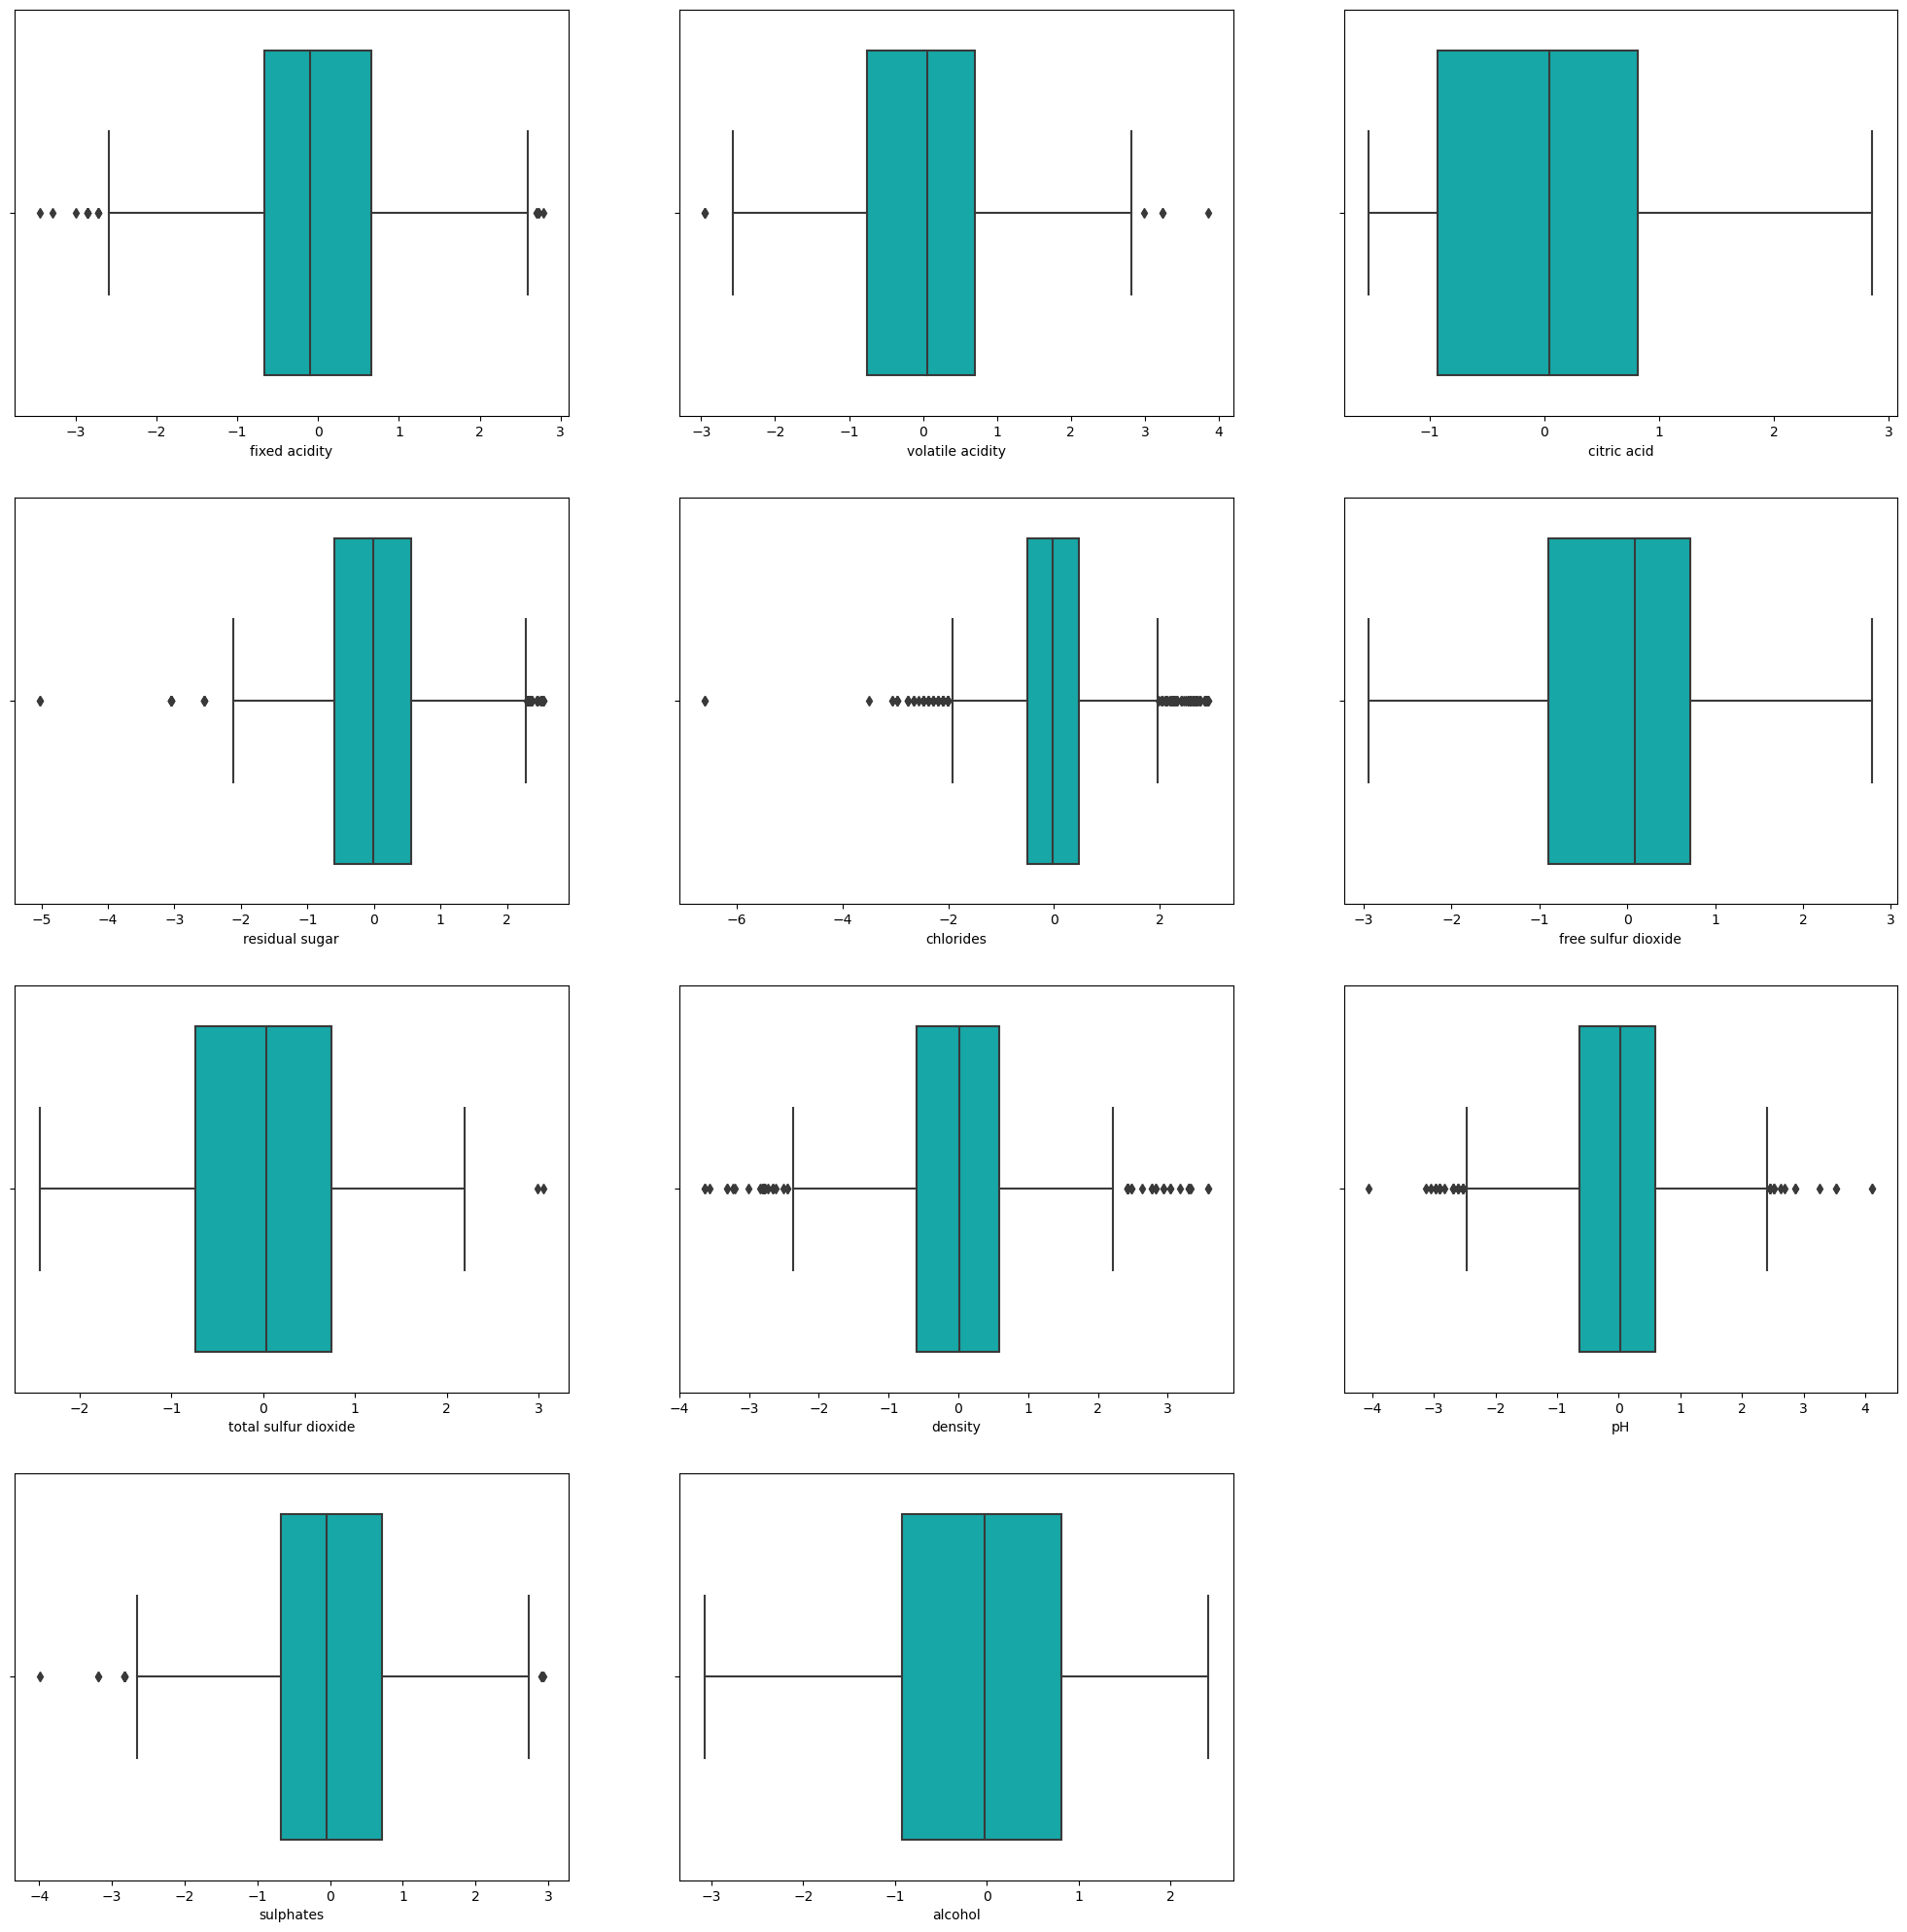

In [17]:
plt.figure(figsize=(25,25))
graph=1

for column in x:
    if graph<=12: 
        ax=plt.subplot(4,3,graph)
        sns.boxplot(x[column],color='c')
        plt.xlabel(column,fontsize=10)
        

    graph+=1
plt.show()

In [18]:
scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

In [19]:
x_scaled.shape[1]

11

In [20]:
x.shape

(1599, 11)

In [21]:
y.shape

(1599,)

In [23]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size= 0.25, random_state =i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred =lr.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('accuracy',acc,'random state',i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy', maxAccu, 'random state',i)

accuracy 0.6025 random state 1
accuracy 0.6025 random state 1
accuracy 0.5825 random state 2
accuracy 0.6025 random state 3
accuracy 0.5875 random state 4
accuracy 0.61 random state 5
accuracy 0.61 random state 5
accuracy 0.6025 random state 6
accuracy 0.5825 random state 7
accuracy 0.59 random state 8
accuracy 0.595 random state 9
accuracy 0.5775 random state 10
accuracy 0.6 random state 11
accuracy 0.625 random state 12
accuracy 0.625 random state 12
accuracy 0.5825 random state 13
accuracy 0.5675 random state 14
accuracy 0.5925 random state 15
accuracy 0.6075 random state 16
accuracy 0.6225 random state 17
accuracy 0.57 random state 18
accuracy 0.6125 random state 19
accuracy 0.595 random state 20
accuracy 0.605 random state 21
accuracy 0.585 random state 22
accuracy 0.6175 random state 23
accuracy 0.5525 random state 24
accuracy 0.605 random state 25
accuracy 0.6175 random state 26
accuracy 0.6025 random state 27
accuracy 0.5925 random state 28
accuracy 0.59 random state 29
accurac

In [30]:
x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size= 0.25, random_state =185)

In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [32]:
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [33]:
print(" The number of classes before fit :",format(Counter(y_train)))
print(" The number of classes after fit  :",format(Counter(y_train_res)))

 The number of classes before fit : Counter({5: 505, 6: 483, 7: 149, 4: 41, 8: 13, 3: 8})
 The number of classes after fit  : Counter({6: 505, 7: 505, 5: 505, 4: 505, 3: 505, 8: 505})


In [34]:
lr =LogisticRegression()
lr.fit(x_train_res,y_train_res)
y_pred =lr.predict(x_test)

In [35]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))
print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))
print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.4025

 confusion matrix 
 [[ 1  0  1  0  0  0]
 [ 0  7  3  2  0  0]
 [19 35 84 27  7  4]
 [ 8 19 28 48 38 14]
 [ 1  0  0  8 20 21]
 [ 0  0  0  0  4  1]]

 report :               precision    recall  f1-score   support

           3       0.03      0.50      0.06         2
           4       0.11      0.58      0.19        12
           5       0.72      0.48      0.58       176
           6       0.56      0.31      0.40       155
           7       0.29      0.40      0.34        50
           8       0.03      0.20      0.04         5

    accuracy                           0.40       400
   macro avg       0.29      0.41      0.27       400
weighted avg       0.58      0.40      0.46       400



In [36]:
scr = cross_val_score(lr,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.582233040201005


In [37]:
# Random Forest Classifier
rf =RandomForestClassifier()
rf.fit(x_train_res,y_train_res)
y_pred =rf.predict(x_test)

In [38]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))
print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))
print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.66

 confusion matrix 
 [[  0   0   2   0   0   0]
 [  1   1   5   4   1   0]
 [  3  10 134  27   2   0]
 [  0   8  35  93  16   3]
 [  0   0   1  13  35   1]
 [  0   0   0   1   3   1]]

 report :               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.05      0.08      0.06        12
           5       0.76      0.76      0.76       176
           6       0.67      0.60      0.63       155
           7       0.61      0.70      0.65        50
           8       0.20      0.20      0.20         5

    accuracy                           0.66       400
   macro avg       0.38      0.39      0.39       400
weighted avg       0.68      0.66      0.67       400



In [39]:
scr = cross_val_score(rf,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.576608040201005


In [40]:
# Decision Tree Classifier
dtc =DecisionTreeClassifier()
dtc.fit(x_train_res,y_train_res)
y_pred =dtc.predict(x_test)

In [41]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))
print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))
print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.565

 confusion matrix 
 [[  1   0   1   0   0   0]
 [  1   2   2   5   2   0]
 [ 10  14 102  42   6   2]
 [  1   6  32  89  22   5]
 [  0   1   6  10  31   2]
 [  0   0   0   2   2   1]]

 report :               precision    recall  f1-score   support

           3       0.08      0.50      0.13         2
           4       0.09      0.17      0.11        12
           5       0.71      0.58      0.64       176
           6       0.60      0.57      0.59       155
           7       0.49      0.62      0.55        50
           8       0.10      0.20      0.13         5

    accuracy                           0.56       400
   macro avg       0.35      0.44      0.36       400
weighted avg       0.61      0.56      0.58       400



In [42]:
scr = cross_val_score(dtc,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.49342650753768846


In [43]:
# KNN Classifier
knn =KNeighborsClassifier()
knn.fit(x_train_res,y_train_res)
y_pred =knn.predict(x_test)

In [44]:
print("accuracy rf normal:",accuracy_score(y_test,y_pred))
print("\n","confusion matrix","\n",confusion_matrix(y_test,y_pred))
print("\n","report :",classification_report(y_test,y_pred))

accuracy rf normal: 0.48

 confusion matrix 
 [[ 0  1  1  0  0  0]
 [ 2  3  6  0  1  0]
 [11 24 94 34 12  1]
 [ 5 18 27 64 28 13]
 [ 0  2  3  8 30  7]
 [ 0  0  0  1  3  1]]

 report :               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.25      0.10        12
           5       0.72      0.53      0.61       176
           6       0.60      0.41      0.49       155
           7       0.41      0.60      0.48        50
           8       0.05      0.20      0.07         5

    accuracy                           0.48       400
   macro avg       0.30      0.33      0.29       400
weighted avg       0.60      0.48      0.52       400



In [45]:
scr = cross_val_score(knn,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.5378140703517588


### Hyper parameter tuning

In [55]:
LogisticRegression()

LogisticRegression()

In [56]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [61]:
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 4, verbose=True, n_jobs=-1)
clf.fit(x_train_res,y_train_res)

Fitting 4 folds for each of 1600 candidates, totalling 6400 fits


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [62]:
clf.best_estimator_

LogisticRegression(C=0.615848211066026)

In [63]:
clf_pred = clf.best_estimator_.predict(x_test)
accuracy_score(y_test,clf_pred)

0.4025

### Random forest

In [64]:
rfc = RandomForestClassifier()

In [86]:
params ={'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
          'min_samples_split':[3,15],
           'min_samples_leaf':[2,10]}

In [87]:
grd =GridSearchCV(rfc,param_grid=params)

In [93]:
grd.fit(x_train_res,y_train_res)
print('best_params = ',grd.best_params_)

best_params =  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 15}


In [94]:
rfc =grd.best_estimator_  

In [95]:
rfc.fit(x_train_res,y_train_res)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=15)

In [96]:
y_pred =rfc.predict(x_test)

In [97]:
print("accuracy:",accuracy_score(y_test,y_pred))
print("\n""confusion matrix","\n",confusion_matrix(y_test,y_pred))
print("\n","report :",classification_report(y_test,y_pred))

accuracy: 0.6275

confusion matrix 
 [[  0   1   1   0   0   0]
 [  1   2   6   2   1   0]
 [  4  13 126  30   3   0]
 [  3   7  32  87  21   5]
 [  0   0   1  13  35   1]
 [  0   0   0   0   4   1]]

 report :               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.09      0.17      0.11        12
           5       0.76      0.72      0.74       176
           6       0.66      0.56      0.61       155
           7       0.55      0.70      0.61        50
           8       0.14      0.20      0.17         5

    accuracy                           0.63       400
   macro avg       0.37      0.39      0.37       400
weighted avg       0.66      0.63      0.64       400

